In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

In [36]:
def monte_carlo_simulation(s, a, b, pity_s, guarantee, amount):
    char_result = []
    roll_to_limited_s = []
    rng_result = []
    # base probability
    total_gacha = s+a+b
    prob_s = s/total_gacha
    prob_a = a/total_gacha
    prob_b = b/total_gacha
    prob_guarantee_s = 0.5
    
    # hitung probabilitas kumulatif
    cum_prob_s = prob_s
    cum_prob_a = cum_prob_s + prob_a
    cum_prob_b = cum_prob_a + prob_b
    
    # track the amount of character
    count_standard_s = 0
    count_limited_s = 0
    count_a = 0
    count_b = 0
    
    # pity system
    pity_s = pity_s
    pity_a = 0
    # pity counter
    count_pity_s = 0
    count_pity_a = 0
    
    # check guarantee
    is_guarantee = guarantee
    
    # looping
    for i in range(amount):
        # random number
        roll = random.random()
        
        if pity_s >= 89:
            pity_s = 0
            pity_a = 0
            count_pity_s += 1
            if is_guarantee:
                count_limited_s += 1
                char_result.append('LS')
                roll_to_limited_s.append(i+1)
                is_guarantee = False
            else:
                if random.random() < prob_guarantee_s:
                    count_limited_s += 1
                    char_result.append('LS')
                    roll_to_limited_s.append(i+1)
                else:
                    count_standard_s += 1
                    char_result.append('S')
                    is_guarantee = True
        else:
            if roll < cum_prob_s:
                pity_s = 0
                pity_a = 0
                if is_guarantee:
                    count_limited_s += 1
                    char_result.append('LS')
                    is_guarantee = False
                    roll_to_limited_s.append(i+1)
                else:
                    if random.random() < prob_guarantee_s:
                        count_limited_s += 1
                        char_result.append('LS')
                        roll_to_limited_s.append(i+1)
                    else:
                        count_standard_s += 1
                        char_result.append('S')
                        is_guarantee = True
            elif roll < cum_prob_a:
                count_a += 1
                pity_s += 1
                pity_a = 0
                char_result.append('A')
            else:
                if pity_a >= 9:
                    count_a += 1
                    pity_s += 1
                    pity_a = 0
                    count_pity_a += 1
                    char_result.append('A')
                else:
                    count_b += 1
                    pity_s += 1
                    pity_a += 1
                    char_result.append('B')
        rng_result.append(roll)
    
    # summary
    print('Base Probabilty Karakter')
    print(f'probability S: {prob_s:.5f}\nprobability A: {prob_a:.5f}\nprobability B: {prob_b:.5f}')
    print(f'\nProbabilitas Kumulatif')
    print(f'Probabilitas S: {cum_prob_s:.5f}\nProbabilitas A: {cum_prob_a:.5f}\nProbabilitas B: {cum_prob_b:.5f}')
    
        
    
    return rng_result, char_result, roll_to_limited_s, count_limited_s, count_standard_s, count_a, count_b

## Input History Data

In [68]:
# Input gacha history
S_char = 5
A_char = 41
B_char = 255
# state awal
pity_awal = 60
guarantee = True
total_sim = 1000000

roll_cost = 160

#jika pity awal 90 maka reset jadi 0 jika melebihi 90 maka sisa dibagi 90
pity_awal = pity_awal if pity_awal < 90 else pity_awal%90
print(f'pity awal : {pity_awal}')

pity awal : 60


## Jalankan Simulasi

In [63]:
rng_result, char_result, roll_to_limited_s, count_limited_s, count_standart_s, count_a, count_b = monte_carlo_simulation(S_char, A_char, B_char, pity_awal, guarantee, total_sim)

Base Probabilty Karakter
probability S: 0.01661
probability A: 0.13621
probability B: 0.84718

Probabilitas Kumulatif
Probabilitas S: 0.01661
Probabilitas A: 0.15282
Probabilitas B: 1.00000


## Hasil Simulasi

In [64]:
#jumlah total karakter S
count_s = count_limited_s + count_standart_s
#probabilitas karakter
prob_limited_s = count_limited_s/total_sim
prob_s = count_s/total_sim
prob_a = count_a/total_sim
prob_b = count_b/total_sim

print(f'Hasil simulasi setelah {total_sim} kali pull')

print(f'\nJumlah karakter\n---------------------')
print(f'Limited S: {count_limited_s}')
print(f'S: {count_s}')
print(f'A: {count_a}')
print(f'B: {count_b}')

print(f'\nProbabilitas karakter \n---------------------')
print(f'Limited S: {prob_limited_s*100:.2f}%')
print(f'S: {prob_s*100:.2f}%')
print(f'A: {prob_a*100:.2f}%')
print(f'B: {prob_b*100:.2f}%')

Hasil simulasi setelah 1000000 kali pull

Jumlah karakter
---------------------
Limited S: 14209
S: 21230
A: 170181
B: 808589

Probabilitas karakter 
---------------------
Limited S: 1.42%
S: 2.12%
A: 17.02%
B: 80.86%


### Karakter Limited S

In [65]:
print(roll_to_limited_s)
interval_limited_s = [roll_to_limited_s[0]] + [roll_to_limited_s[i] - roll_to_limited_s[i-1] for i in range(1, len(roll_to_limited_s))]
print(f'\nRolls at which limited character S was obtained: \n{interval_limited_s}')

print(f'\n\nSummary\n---------------------')
average_limited_s = np.mean(interval_limited_s)
print(f'Average rolls to get limited character S: {average_limited_s:.1f} Pulls')
print(f'Average cost to get limited character S: {average_limited_s*roll_cost:.1f} Polychromes')

#pull needed to get the character from pity awal
print(f'---------------------')
print(f'Pull needed to get the character based on pity awal : {average_limited_s - pity_awal:.0f} Pulls')
print(f'Cost needed to get limited character S: {(average_limited_s - pity_awal)*roll_cost:.0f} Polychromes')

#pity counter
amount_pity_s = interval_limited_s.count(90)
print(f'\nPity\n---------------------')
print(f'Amount of pity S: {amount_pity_s}')
print(f'Probability of getting unlucky {(amount_pity_s/total_sim)*100:.3f}%')

[30, 120, 177, 225, 315, 335, 425, 448, 465, 550, 617, 620, 623, 726, 802, 915, 945, 955, 994, 1050, 1130, 1137, 1180, 1197, 1287, 1370, 1461, 1561, 1565, 1608, 1704, 1851, 1875, 1981, 2114, 2161, 2169, 2193, 2296, 2302, 2341, 2396, 2486, 2530, 2548, 2650, 2767, 2789, 2808, 2880, 2970, 2971, 3000, 3090, 3096, 3156, 3252, 3319, 3374, 3395, 3434, 3484, 3574, 3625, 3653, 3743, 3856, 3956, 4023, 4134, 4169, 4259, 4326, 4434, 4453, 4600, 4780, 4846, 4874, 4972, 5064, 5158, 5198, 5265, 5355, 5444, 5467, 5608, 5670, 5760, 5761, 5851, 5952, 6050, 6154, 6182, 6233, 6292, 6382, 6413, 6450, 6546, 6631, 6731, 6821, 7001, 7111, 7216, 7261, 7351, 7359, 7442, 7532, 7595, 7648, 7724, 7801, 7981, 8051, 8119, 8238, 8285, 8364, 8374, 8460, 8495, 8585, 8677, 8767, 8802, 8871, 8909, 8934, 9024, 9057, 9222, 9312, 9370, 9443, 9497, 9517, 9607, 9720, 9880, 9966, 10033, 10054, 10197, 10205, 10307, 10349, 10517, 10569, 10618, 10641, 10653, 10800, 10819, 10874, 10940, 10951, 10964, 10967, 10985, 11165, 11255, 11

### Karakter S in General

In [ ]:
# average pull needed (ditambah 1 karena index mulai dari 0)
rolls_to_get_s = [index + 1 for index, char in enumerate(char_result) if char == 'S' or char == 'LS']
print(f'Rolls at which character S was obtained: {rolls_to_get_s}')

interval_rolls_to_s = [rolls_to_get_s[0]] + [rolls_to_get_s[i] - rolls_to_get_s[i-1] for i in range(1, len(rolls_to_get_s))]

print(f'Rolls to get character S: {interval_rolls_to_s}')

print(f'\n\nSummary\n---------------------')
average_s = np.mean(interval_rolls_to_s)
print(f'Average rolls to get character S: {average_s:.1f} Pulls')
print(f'Average cost to get character S: {average_s*roll_cost:.1f} Polychromes')

#pull needed to get the character from pity awal
print(f'---------------------')
print(f'Pity awal : {pity_awal}')
pull_needed = average_s - pity_awal 
print(f'Pull needed to get the character based on pity awal : {pull_needed:.0f} Pulls')
print(f'Cost needed to get limited character S: {pull_needed*roll_cost:.0f} Polychromes')


amount_pity_s = interval_rolls_to_s.count(90)
print(f'\nPity\n---------------------')
print(f'Amount of pity S: {amount_pity_s}')
print(f'Probability of getting unlucky: {(amount_pity_s/total_sim)*100:.3f}%')

Rolls at which character S was obtained: [30, 120, 177, 225, 315, 335, 425, 448, 456, 465, 550, 617, 618, 620, 623, 703, 726, 771, 802, 892, 915, 945, 955, 994, 1050, 1130, 1131, 1137, 1142, 1180, 1197, 1242, 1287, 1370, 1460, 1461, 1551, 1561, 1565, 1608, 1614, 1704, 1763, 1851, 1875, 1941, 1981, 2041, 2114, 2161, 2169, 2193, 2229, 2296, 2302, 2341, 2394, 2396, 2486, 2530, 2548, 2582, 2650, 2740, 2767, 2788, 2789, 2808, 2866, 2880, 2970, 2971, 3000, 3090, 3096, 3156, 3246, 3252, 3300, 3319, 3374, 3395, 3408, 3434, 3484, 3574, 3625, 3653, 3743, 3793, 3856, 3946, 3956, 4003, 4023, 4077, 4134, 4169, 4259, 4324, 4326, 4364, 4434, 4453, 4543, 4600, 4690, 4780, 4846, 4874, 4882, 4972, 4974, 5064, 5154, 5158, 5198, 5259, 5265, 5355, 5444, 5467, 5518, 5608, 5655, 5670, 5760, 5761, 5851, 5862, 5952, 5960, 6050, 6132, 6154, 6176, 6182, 6223, 6233, 6236, 6292, 6382, 6392, 6413, 6450, 6540, 6546, 6600, 6631, 6697, 6731, 6821, 6911, 7001, 7091, 7111, 7201, 7216, 7261, 7351, 7359, 7415, 7442, 7532,

## Tabel

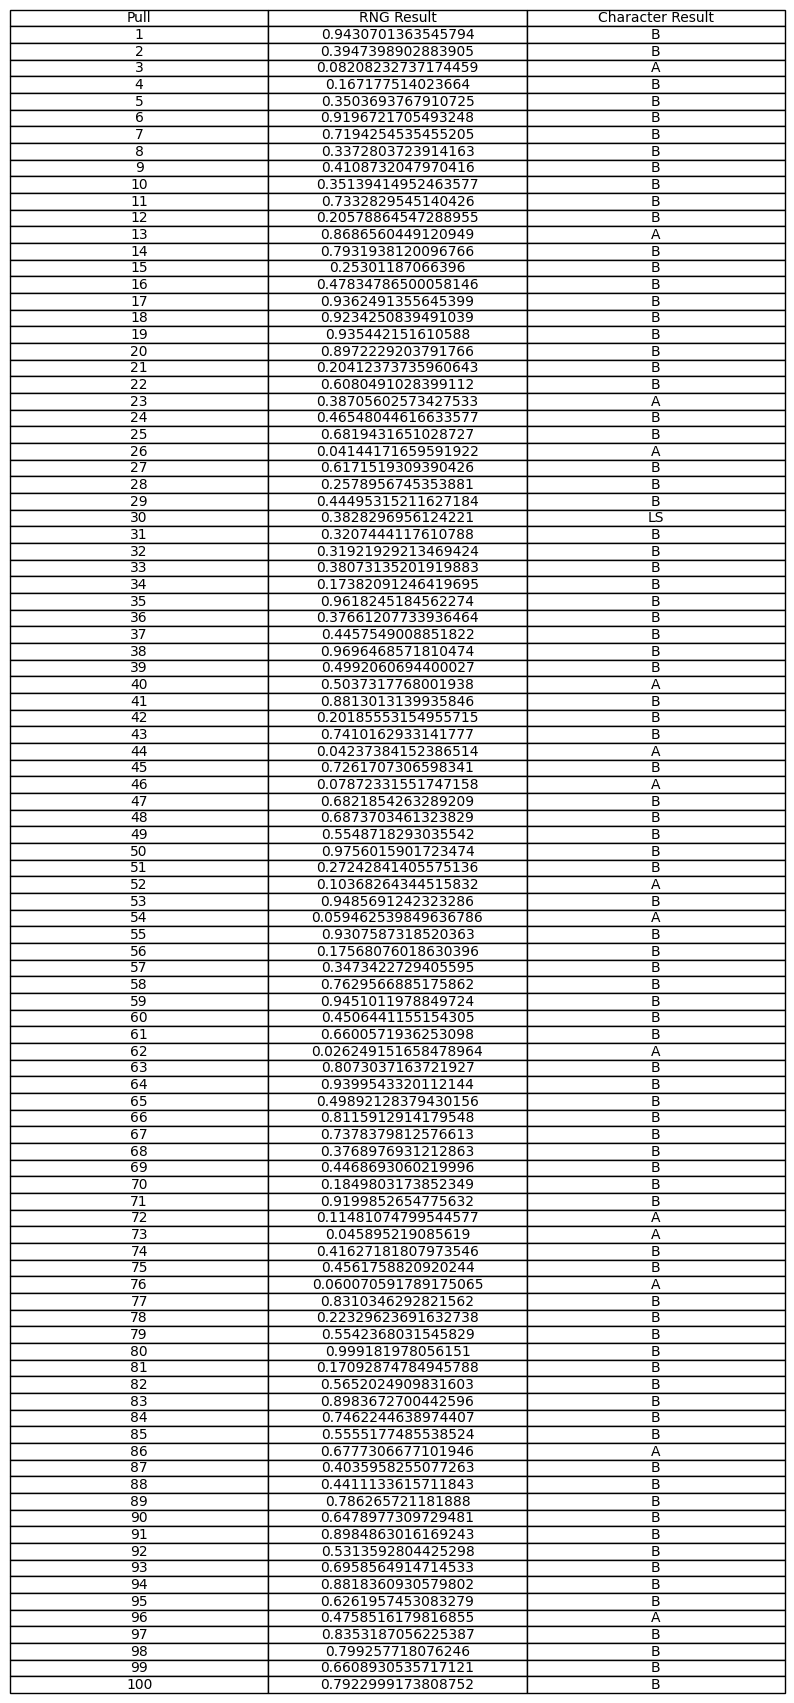

In [67]:
data = {
    'Pull': range(1, total_sim + 1),
    'RNG Result': rng_result,
    'Character Result': char_result
}

df = pd.DataFrame(data)

# Plot the table
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=df.head(100).values, colLabels=df.columns, cellLoc='center', loc='center')

plt.show()